# PREDICTING PRICE OF AirBnB - NYC LISTINGS

### OBJECTIVE & PROBLEM DEFINITION
The following notebook showcases my analysis of AirBnB listings dataset originally posted on Kaggle by Dgomonov. The listings were scrapped on July 8th 2019 and are specific to NYC, NY. The dataset can be downloaded from [here](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data).
<br>
Our objective in this project is to predict the price of a listing on Airbnb based on the predictors we have. We will also try to find out which feature is the most important or influences price the most. 
<br>
My learning through this project has been immense. [Will Koehrsen's](https://towardsdatascience.com/improving-random-forest-in-python-part-1-893916666cd) medium articles on machine learning model enhancements has in particular been very helpful.

### BREAKDOWN OF NOTEBOOK
This notebook comprises of the following broad categories: <br>
1. Importing the required libraries & reading the dataset. <br>
2. Exploratory Data Analysis.
   - Single variable plots - histogram of target variable.
   - Countplots for categories.
   - Boxplots to understand distribution of predictors. 
   - Kernel Density Plots
   - Heat Maps
   - Pair Plots
3. Feature Engineering & Feature Selection <br>
4. Splitting data into train and test sets
5. Baseline Model Evaluation & Metric Selection
6. Imputation & Feature Scaling
7. M/L Model Training & Performance Evaluation
   - Linear Regression
   - Random Forest Regressor
   - Gradient Boosting Regressor
8. Model Optimization
   - Feature Selection
   - Hyperparameter Optimization (in notebook 2)
9. Inference (in notebook 2)
10. Summary of Results (in notebook 2)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [2]:
airbnb=pd.read_csv(r'C:\Users\niveh\Desktop\AB_NYC_2019.csv')

In [3]:
airbnb.shape

(48895, 16)

In [4]:
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [5]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

We note that the last_review and reviews_per_month columns have some missing values, but none more than ~20% of total, so they should not hamper with our analysis. 

In [6]:
# Checking for duplicates - df.duplicated() returns a boolean series denoting duplicate rows.
# If we sum them we get the number of duplicate entries.
airbnb.duplicated().sum()

0

In [7]:
# We see that there are no duplicate entries in the dataset.

In [8]:
# Filling in NaN or Na values with appropriate values for 'last_review' column (which we may not need for analysis) and
# we will later be imputing with median values for 'reviews_per_month' column.
airbnb.fillna({'last_review':'Not Available'},inplace=True)

In [9]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

### EXPLORATORY DATA ANALYSIS

To begin the EDA, we will focus on a single variable, the price of the listings, because this is the target for our machine learning models.

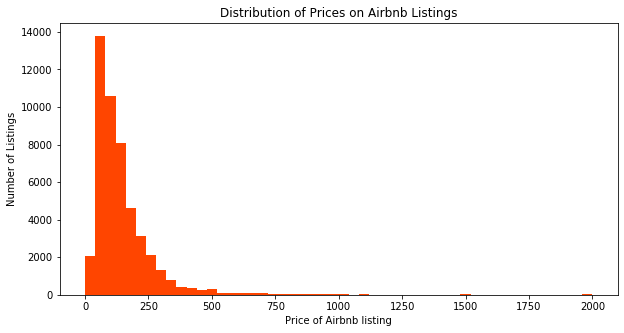

In [10]:
fig,ax=plt.subplots(figsize=(10,5))

ax.hist(airbnb['price'],range=(0,2000),bins=50,color='orangered')
ax.set_xlabel('Price of Airbnb listing')
ax.set_ylabel('Number of Listings')
ax.set_title('Distribution of Prices on Airbnb Listings')
plt.show()

In [11]:
airbnb.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


We note some anomalies - the minimum price & max price listings are 0 & 10000 dollars, both of which are extremes that we would not expect. The histogram is right skewed, which we would expect as the number of listings get fewer and fewer as price increases, thereby giving the plot a long right tail. 

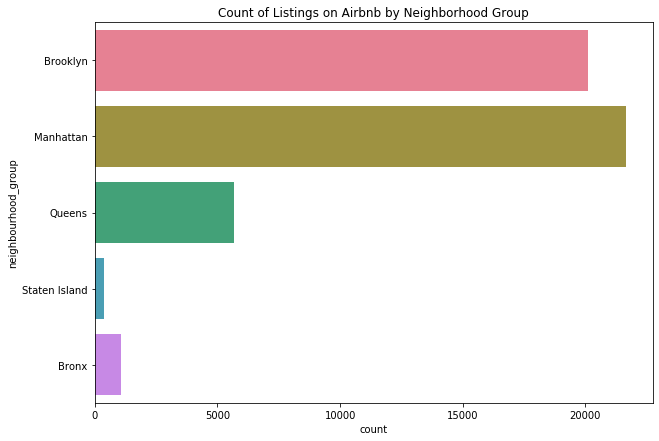

In [12]:
fig,ax=plt.subplots(figsize=(10,7))
sns.countplot(ax=ax,y='neighbourhood_group',data=airbnb,palette='husl')
plt.title('Count of Listings on Airbnb by Neighborhood Group')
plt.show()

We can observe that Manhattan & Brooklyn have the most amount of listings on Airbnb.

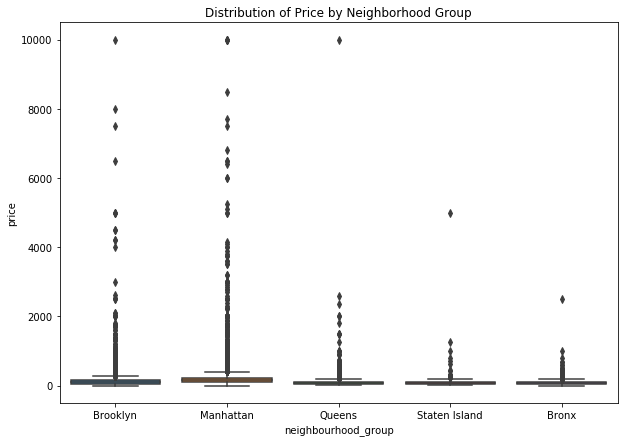

In [13]:
fig,ax=plt.subplots(figsize=(10,7))
sns.boxplot(x='neighbourhood_group',y='price',data=airbnb)
plt.title('Distribution of Price by Neighborhood Group')
plt.show()

This plot re-emphasizes the right skew, but we can also see a number of outliers. Let us try and remove the extreme outliers for our analysis. 
<br>
*On the lower end, an extreme outlier = First Quartile - 3*IQR*
<br>
*On the upper end, an extreme outlier = Third Quartile + 3*IQR*

In [14]:
quartile_1 = airbnb['price'].describe()['25%']
quartile_3 = airbnb['price'].describe()['75%']
iqr = quartile_3 - quartile_1
out_lower = quartile_1 - (3*iqr)
out_upper = quartile_3 + (3*iqr)
print(out_lower,out_upper)

-249.0 493.0


We will now filter out the listings which have a price above 493 dollars or have a price = 0 (which does not make sense). 

In [15]:
airbnb = airbnb[airbnb['price'].between(1,493)]
airbnb.shape

(47556, 16)

We now have 47556 rows in our dataset after filtering. Let us see how the price distribution by neighborhood group plot looks now.

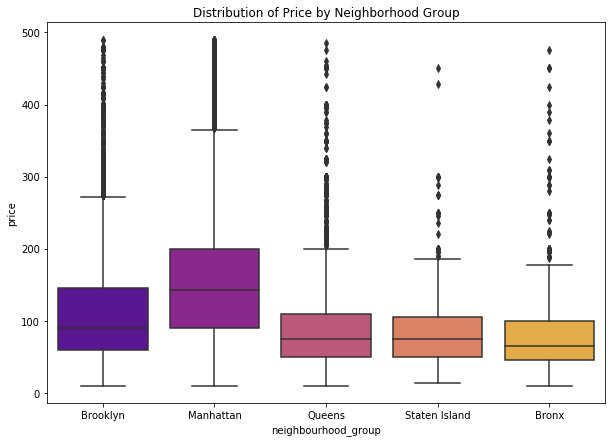

In [16]:
fig,ax=plt.subplots(figsize=(10,7))
sns.boxplot(x='neighbourhood_group',y='price',data=airbnb,palette='plasma')
plt.title('Distribution of Price by Neighborhood Group')
plt.show()

We can observe from the above graph that the neighborhood group does have an effect on price. Although the Queens, Staten Island and Bronx neighborhoods have similar price distributions, Brooklyn and Manhattan have a higher median price and slightly different distribution. However, the neighborhood groups do not seem to make a significant difference to the distribution of price. We will take this categorical variable into consideration as a predictor for our model, however. 

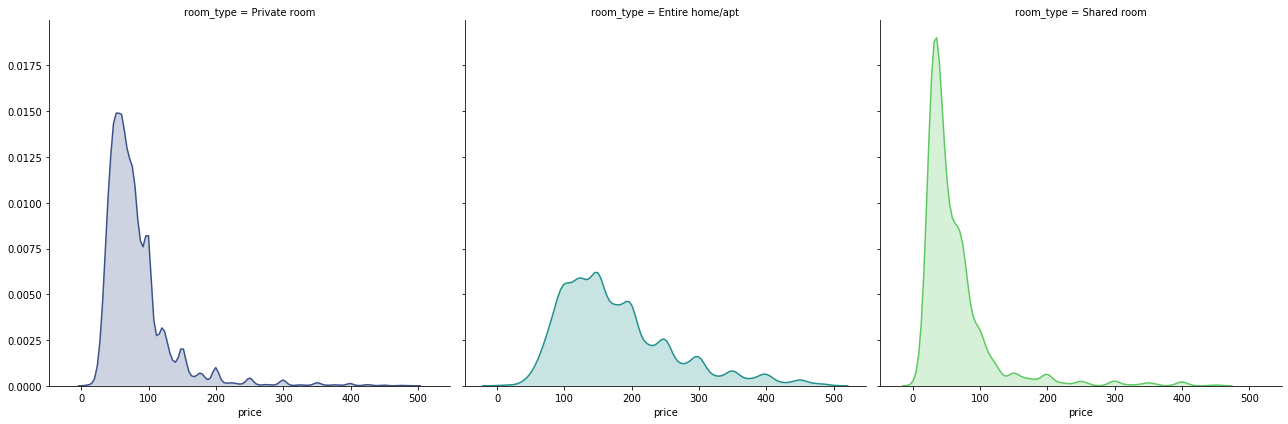

In [17]:
g=sns.FacetGrid(airbnb,col='room_type',height=6,hue='room_type',palette='viridis')
g.map(sns.kdeplot,'price',shade=True)
plt.show()

From this graph, we can see that the room type does have an effect on the price. 
<br>
As room_type & neighbourhood_group are categorical variables, they will have to be one-hot encoded before we can feed them into a machine learning model.

Text(0.5, 1.0, 'Count of Room Types')

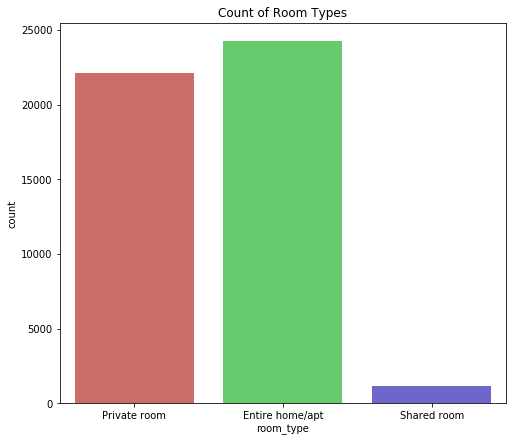

In [18]:
# Counts of room_types that appeared on Airbnb listings
fig,ax=plt.subplots(figsize=(8,7))
sns.countplot(x='room_type',data=airbnb,palette='hls')
plt.title('Count of Room Types')

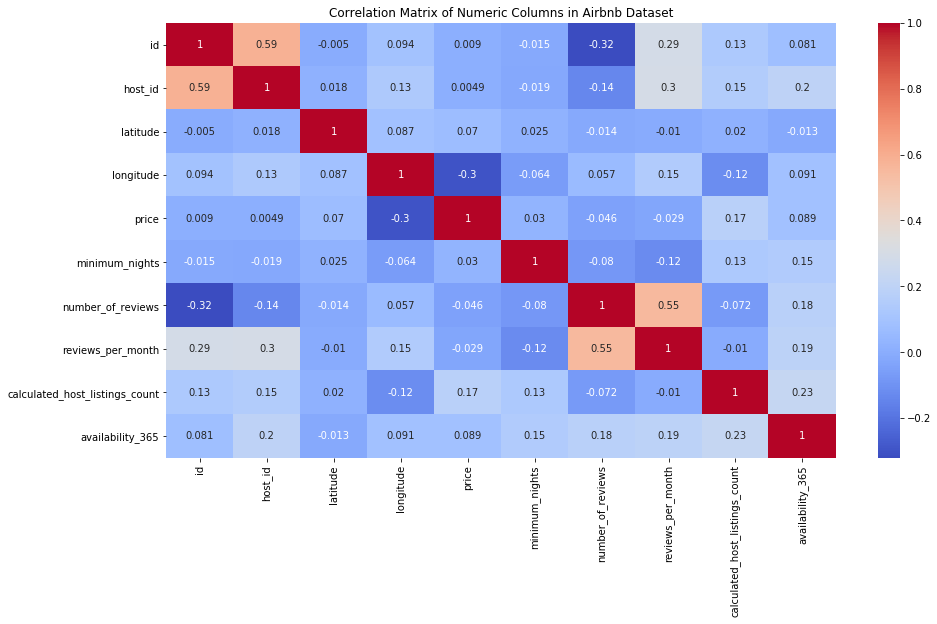

In [19]:
corr = airbnb.corr(method='pearson')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True,cmap="coolwarm")
plt.title('Correlation Matrix of Numeric Columns in Airbnb Dataset')
plt.show()

There are weak correlations between the factors & the price. The highest positive correlation is between price & calculated_host_listings_count & the most negative correlation is between longitude and price (we would expect that this could mean a correlation between neighbourhood_group & price - which we will know once we one-hot encode this column). The correlation coefficient captures the linear relationship between variables & to account for any possible non-linear relation, we have to mathematically transform the numerical variables and check.
<br>
Let us try plotting price v/s the numerical predictors to guage what kind of transformation may be useful, or if a transformation may be useful at all.

In [20]:
num_predictors=airbnb[['price','calculated_host_listings_count','availability_365','number_of_reviews','reviews_per_month','minimum_nights','latitude','longitude']]

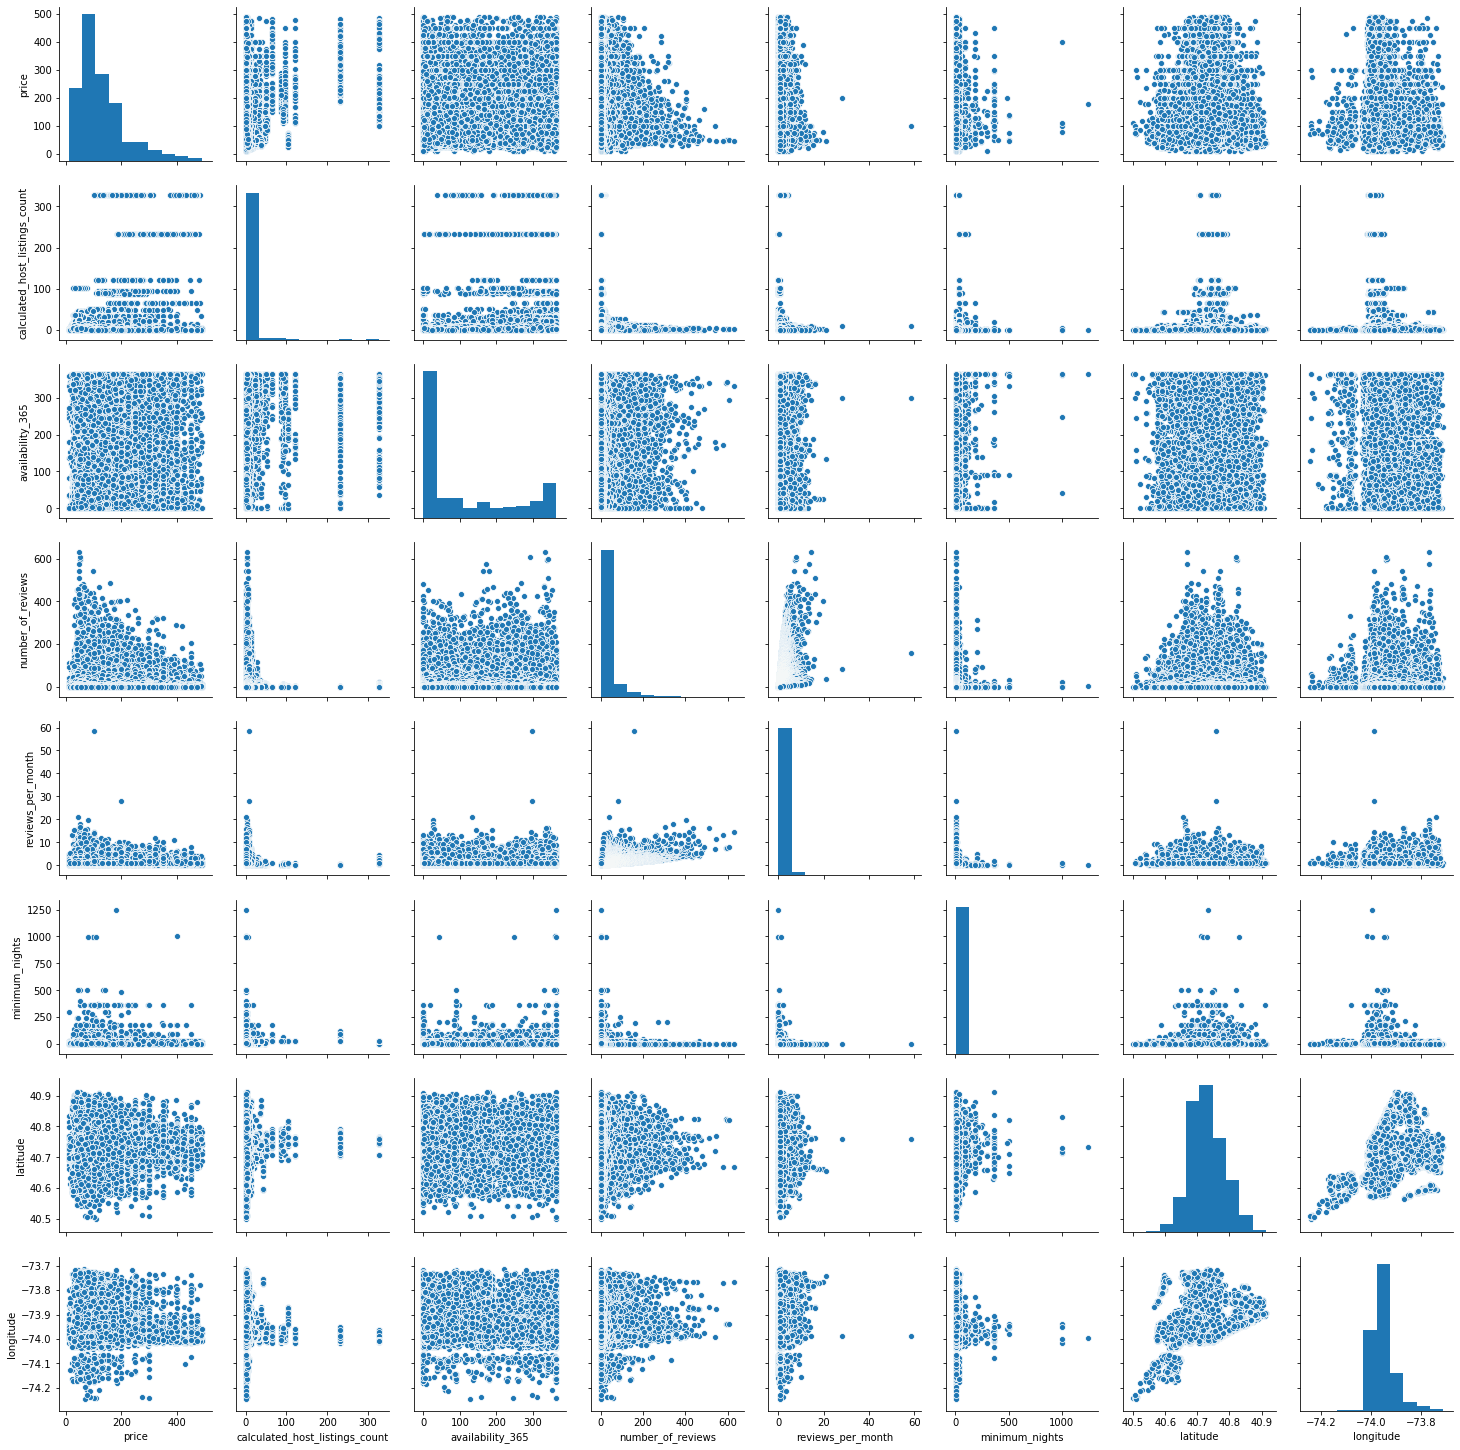

In [21]:
sns.pairplot(num_predictors)

From these pair plots, we can observe that we might be able to increase the correlation between price and availability_365 and number_of_reviews by taking a square root transformation. Let us add the transformed columns to our Airbnb dataframe and check the correlations once again.

### FEATURE ENGINEERING & FEATURE SELECTION

In [22]:
num_predictors.loc[:,'sqrt_availability_365']=np.sqrt(num_predictors['availability_365'])
num_predictors.loc[:,'sqrt_number_of_reviews']=np.sqrt(num_predictors['number_of_reviews'])
#num_predictors.loc[:,'log_price']=np.log(num_predictors['price'])
num_predictors.loc[:,'log_calculated_host_listings_count']=np.log(num_predictors['calculated_host_listings_count'])

C:\Users\niveh\anaconda3\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\niveh\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


We can ignore the setting with copy warning in this case and check if the column has been added properly. Next, we will have to one-hot encode the 2 categorical variables of our consideration - neighbourhood_group and room_type.

In [23]:
num_predictors.head()

,price,calculated_host_listings_count,availability_365,number_of_reviews,reviews_per_month,minimum_nights,latitude,longitude,sqrt_availability_365,sqrt_number_of_reviews,log_calculated_host_listings_count
0,149,6,365,9,0.21,1,40.64749,-73.97237,19.104973,3.000000,1.791759
1,225,2,355,45,0.38,1,40.75362,-73.98377,18.841444,6.708204,0.693147
2,150,1,365,0,NaN,3,40.80902,-73.94190,19.104973,0.000000,0.000000
3,89,1,194,270,4.64,1,40.68514,-73.95976,13.928388,16.431677,0.000000
4,80,1,0,9,0.10,10,40.79851,-73.94399,0.000000,3.000000,0.000000


In [24]:
cat_predictors = airbnb[['neighbourhood_group','room_type']]
# One - hot encode
cat_predictors = pd.get_dummies(cat_predictors)

I referred to this Medium Article on TDS for choosing an encoding method  - [link]( https://towardsdatascience.com/categorical-encoding-using-label-encoding-and-one-hot-encoder-911ef77fb5bd).

In [25]:
features = pd.concat([num_predictors,cat_predictors],axis=1)
# We can drop the 2 original numerical predictors which we have transformed into a sqrt variant.
features.drop(['number_of_reviews','availability_365','calculated_host_listings_count'],axis=1,inplace=True)

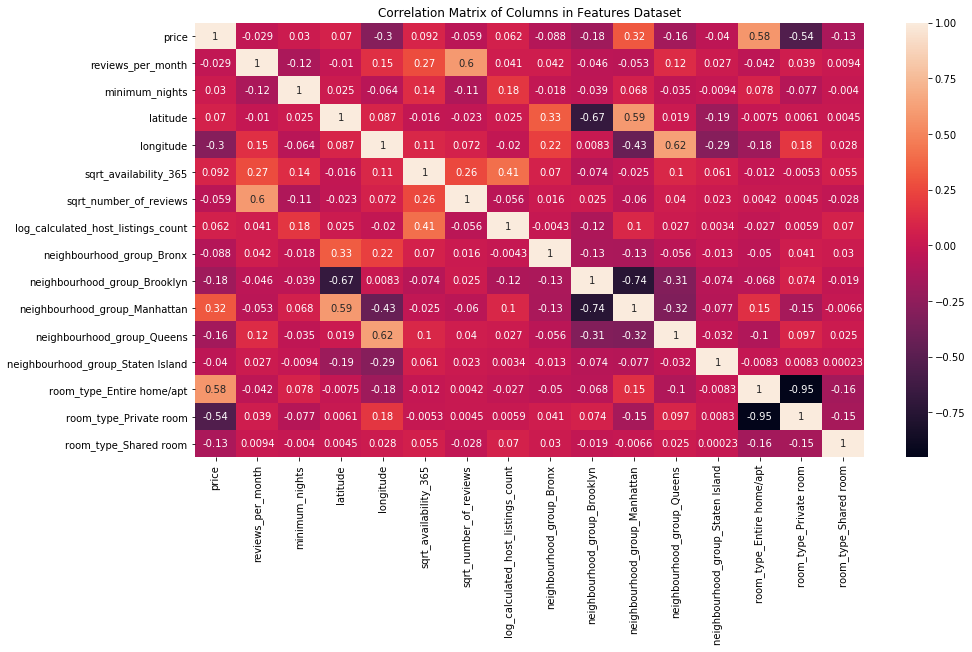

In [26]:
corr = features.corr(method='pearson')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True,cmap="rocket")
plt.title('Correlation Matrix of Columns in Features Dataset')
plt.show()

In [27]:
features.head()

,price,reviews_per_month,minimum_nights,latitude,longitude,sqrt_availability_365,sqrt_number_of_reviews,log_calculated_host_listings_count,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,149,0.21,1,40.64749,-73.97237,19.104973,3.000000,1.791759,0,1,0,0,0,0,1,0
1,225,0.38,1,40.75362,-73.98377,18.841444,6.708204,0.693147,0,0,1,0,0,1,0,0
2,150,NaN,3,40.80902,-73.94190,19.104973,0.000000,0.000000,0,0,1,0,0,0,1,0
3,89,4.64,1,40.68514,-73.95976,13.928388,16.431677,0.000000,0,1,0,0,0,1,0,0
4,80,0.10,10,40.79851,-73.94399,0.000000,3.000000,0.000000,0,0,1,0,0,1,0,0


In [28]:
features.shape

(47556, 16)

**Feature Engineering:** <br>
We have already completed the basic steps of feature engineering. To summarize, we did the following: <br>
(a) Selected only the numerical variables and two categorical variables ('neighbourhood_type' and 'room_type') <br>
(b) Added in the square root transformation for 2 of the numerical variables ('number_of_reviews' and 'availability_365') <br>
(c) One-hot encoded the categorical variables

**Feature Selection:** <br>
One step of feature selection that we have already completed was to remove the 'reviews_per_month' and 'availability_365' predictors as they had been transformed into new predictors using sqrt transformation, and as a result would result in collinearity between features had they been considered.

### SPLITTING DATA INTO TRAINING & TEST SETS

In [29]:
target = pd.DataFrame(features['price'])
target.shape

(47556, 1)

In [30]:
features.drop('price',axis=1,inplace=True)
features.shape

(47556, 15)

In [31]:
features_list = list(features.columns)
print(features_list)

['reviews_per_month', 'minimum_nights', 'latitude', 'longitude', 'sqrt_availability_365', 'sqrt_number_of_reviews', 'log_calculated_host_listings_count', 'neighbourhood_group_Bronx', 'neighbourhood_group_Brooklyn', 'neighbourhood_group_Manhattan', 'neighbourhood_group_Queens', 'neighbourhood_group_Staten Island', 'room_type_Entire home/apt', 'room_type_Private room', 'room_type_Shared room']


In [32]:
train_X, test_X, train_Y, test_Y = train_test_split(features, target, test_size = 0.3, random_state = 24)

In [33]:
print(train_X.shape)
print(train_Y.shape)
print(test_X.shape)
print(test_Y.shape)

(33289, 15)
(33289, 1)
(14267, 15)
(14267, 1)


We have used scikit-learn to randomly split our data into test & train sets. We are setting a random state to get consistent results. We thus have 38044 records in our training set and 9512 in our testing set.

### BASELINE MODEL & METRIC SELECTION

When working on a regression problem, we can use a central tendency like the mean/median as a baseline. If we were attempting a classification problem, our baseline prediction would simply be the class that has the most observations. 
<br> 
In this context, let us calculate the median of our train_Y set & then get our test set performance with our baseline value, that our ML model has to beat.
<br> 
Our chosen metric is MAE (Mean Absolute Error). Link to reference article for choosing this metric is [here](https://medium.com/human-in-a-machine-world/mae-and-rmse-which-metric-is-better-e60ac3bde13d).

In [34]:
baseline = np.median(train_Y)
print(baseline)

100.0


In [35]:
mae = np.mean(abs(test_Y-baseline))
print(mae)

price    62.337702
dtype: float64


MAE of 62 implies that on average, the forecast's distance from the true value is 62 or the predictions are off by 62 points. This is the baseline for our models to beat.

### IMPUTATION & FEATURE SCALING

Our dataset was pretty clean and since we are not considering the 'last_review' column as a potential feature (owing to the fact that it is supposed to be a datetime variable and would not make much sense as a predictor), we had dropped it. 
<br> 
Let us now perform a simple imputation for the other variable which had a lot of NaN's - 'number_of_reviews' by replacing the NaN values with the median value of the column. We have to do imputation at this stage rather than earlier so as to minimize data leakage. 

In [36]:
train_X['reviews_per_month'].isna().sum()

6658

In [37]:
# Create an imputer object which fills NaN's with median
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
# Train on training set features
imputer.fit(train_X)
# Transform train & test data
train_X = imputer.transform(train_X)
test_X = imputer.transform(test_X)

In [38]:
print('Missing values in training set: ', np.sum(np.isnan(train_X)))
print('Missing values in testing set:  ', np.sum(np.isnan(test_X)))

Missing values in training set:  0
Missing values in testing set:   0


For feature scaling, we will be doing a normalized scaling - which involves subtracting the mean of predictor from each value of predictor and then dividing by the standard deviation for that feature. 

With imputation & feature-scaling, we train the object only on training set but we transform the features on the training and test sets. 

In [39]:
# Create the scaler object with a range of 0-1
scaler = MinMaxScaler(feature_range=(0, 1))
# Fit on the training data
scaler.fit(train_X)
# Transform train & test data
train_X = scaler.transform(train_X)
test_X = scaler.transform(test_X)

In [40]:
# Convert y to one-dimensional array (vector)
train_Y = np.array(train_Y).reshape((-1, ))
test_Y = np.array(test_Y).reshape((-1, ))

### MACHINE LEARNING MODEL TRAINING & PERFORMANCE EVALUATION

In [41]:
from sklearn import metrics
def ml_model(mod_obj):
    mod_obj.fit(train_X,train_Y)
    pred_Y = mod_obj.predict(test_X)
    mae = metrics.mean_absolute_error(test_Y,pred_Y)
    return mae

In [42]:
lr = LinearRegression()
mae_lr = ml_model(lr)
print(mae_lr)

44.15500367982057


In [43]:
rf = RandomForestRegressor(n_estimators=1000,random_state=60)
mae_rf = ml_model(rf)
print(mae_rf)

38.746569075488885


In [44]:
gb = GradientBoostingRegressor(n_estimators=1000,random_state=60)
mae_gb= ml_model(gb)
print(mae_gb)

38.85054166394601


### MODEL OPTIMIZATION 

We note that the random forest regressor gives us the least MAE of our three models, and performs slightly better than gradient boosting regressor, so we will pick this model to optimize.
<b>
#### Feature Selection

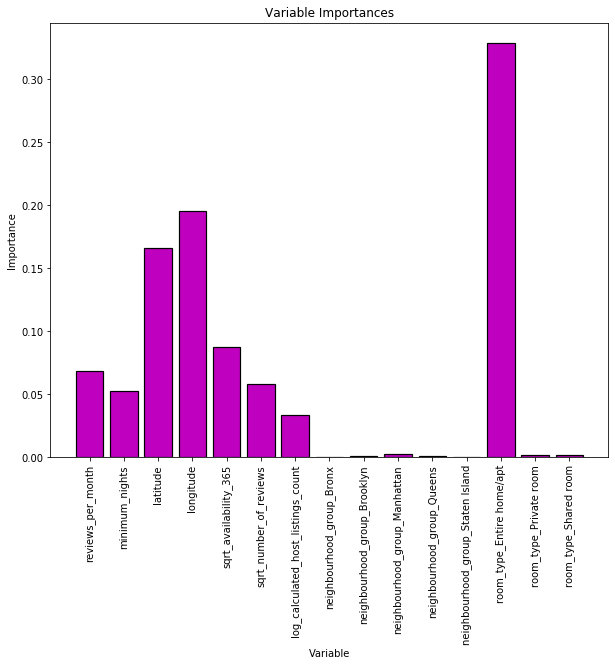

In [45]:
importances = list(rf.feature_importances_)

x_values = list(range(len(importances)))
# Make a bar chart
fig,ax = plt.subplots(figsize=(10,8))
ax.bar(x_values, importances, orientation = 'vertical', color = 'm', edgecolor = 'k', linewidth = 1.2)
plt.xticks(x_values, features_list, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

We can now create new training and test sets based on just the important features.

In [46]:
important_features = ['reviews_per_month','minimum_nights','latitude','longitude','sqrt_availability_365','sqrt_number_of_reviews',
                      'log_calculated_host_listings_count','room_type_Entire home/apt']
print(train_X.shape,test_X.shape)

(33289, 15) (14267, 15)


In [47]:
indices=[]
for key in important_features:
    indices.append(features.columns.get_loc(key))
print(indices)

[0, 1, 2, 3, 4, 5, 6, 12]


In [48]:
important_train_X = train_X[:,indices]
important_test_X = test_X[:,indices]
print(important_train_X.shape,important_test_X.shape)

(33289, 8) (14267, 8)


In [49]:
rf = RandomForestRegressor(n_estimators=1000,random_state=60)

In [ ]:
rf.fit(important_train_X,train_Y)

In [ ]:
pred_Y = rf.predict(important_test_X)
mae = metrics.mean_absolute_error(test_Y,pred_Y)
print(mae_rf)

The performance of our model has not changed at all, but by eliminating unncessary features, we have decreased the run time of the model! 

#### Hyperparameter Optimization

In [ ]:
# Check default values of parameters used by the random forest regressor
rf.get_params()

Now that we have obtained the default paramters, we shall work on implementing a randomized search CV followed by a grid search CV to boost our model performance and reduce MAE even more. Finally, we shall interpret our model and summarize results. The rest of this analysis has been continued in notebook 2. 